In [ ]:
import pandas as pd
import numpy as np
!pip install catboost
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


## Dataset description

* **Gender**: Gender of the passengers (Female, Male)

* **Customer Type**: The customer type (Loyal customer, disloyal customer)

* **Age**: The actual age of the passengers

* **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

* **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

* **Flight distance**: The flight distance of this journey

* **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

* **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

* **Ease of Online booking**: Satisfaction level of online booking

* **Gate location**: Satisfaction level of Gate location

* **Food and drink**: Satisfaction level of Food and drink

* **Online boarding**: Satisfaction level of online boarding

* **Seat comfort**: Satisfaction level of Seat comfort

* **Inflight entertainment**: Satisfaction level of inflight entertainment

* **On-board service**: Satisfaction level of On-board service

* **Leg room service**: Satisfaction level of Leg room service

* **Baggage handling**: Satisfaction level of baggage handling

* **Check-in service**: Satisfaction level of Check-in service

* **Inflight service**: Satisfaction level of inflight service

* **Cleanliness**: Satisfaction level of Cleanliness

* **Departure Delay in Minutes**: Minutes delayed when departure

* **Arrival Delay in Minutes**: Minutes delayed when Arrival

* **Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

*Source: kaggle.com*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "drive/MyDrive/Colab Notebooks/Dataset's/train.csv"

"drive/MyDrive/Colab Notebooks/Dataset's/train.csv"


In [ ]:
train = pd.read_csv("drive/MyDrive/Colab Notebooks/Dataset's/train.csv")
print(train.shape)
train.head()

(103904, 24)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
test = pd.read_csv("drive/MyDrive/Colab Notebooks/Dataset's/test.csv")
print(test.shape)
test.head()

(25976, 24)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


## Assignment (you can start on Dec, 10)

### Carry out an expolaratory data analysis

1. Check for missing values. If there are any, you should decide what to do with them:

* Usually, if most of the data (>60%) in the column is missing and the column is not crucial for modelling, you can just delete it. 

You can replace the missing data with:
- a measure of the central tendency over the entire column
- a measure of the central tendency within the group
- a random element

**Quantitative data**:
- **Continuous**
  - Symmetric distribution:
    - replace with **median**/mean
  - Asymmetric distribution:
    - replace with median
- **Discrete**
  - replace with mode / average

**Categorical data**:
  - replace with mode
  
Another option is to create a separate model and use it for predicting missing values.

2. Carry out univariate analysis. Use .describe(), vizualization and other methods to check out the distribution of the columns. Are there any outliers? If there are, you can drop them or replace them similarly to missing values. There are also a bunch of other methods to work with outliers, feel free to do more research!

3. Carry out multivariate analysis. For example, you can use scatter plots and a correlation matrix. *Side note: keep in mind that correlation only checks for linear dependencies. If the correlation is small, it doesn't mean that there is no dependency at all, only that there is no **linear** dependency.*

4. Use grouping (.group), filterings (for example, like this ``df[df[col] > df[col].quantile(.95)]``), vizualizations to formulate different hypothesis about the data. For example, maybe loyal customers are usually business travelers? Check it out! Don't forget to write down your conclusions.

The grade for this part will be based on:
1. Completing the plan above (2 points)
2. Cleanliness of your code and formatting of jupyter notebook: It should be filled with comments to your code and conclusions to your research, so we can understand follow your ideas. You should also strive to demonstrate your pandas knowledge and use as much methods from the lecture as possible (3 points)
3. How full your EDA is: imagine that this is a real-life project for your job. Try to test as many interesting and useful to business hypothesis as possible. You will get a higher grade for this criteria if you present a detailed and useful analysis, rather than just checking random correlations. (10 points)

In [ ]:
num_cols_graphics = train.columns[[3]].tolist() + train.columns[6:23].tolist()
categ_cols_graphics = train.columns[1:3].tolist() + train.columns[4:6].tolist()
target_col_graphics = train.columns[[23]].tolist()
all_features_graphics = categ_cols_graphics + num_cols_graphics
train.iloc[:, 1:].head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


'\nClasses are relatively balanced.\n'

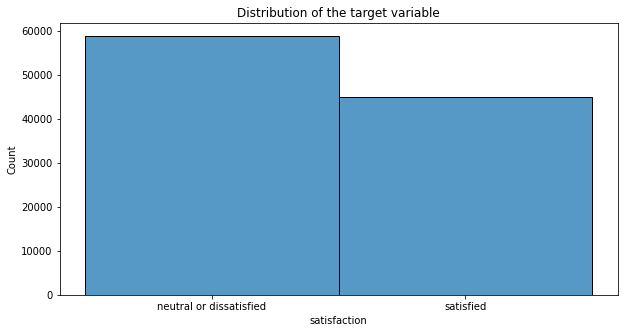

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(train[target_col_graphics].satisfaction, ax = ax)
plt.title('Distribution of the target variable')

'''
Classes are relatively balanced.
'''

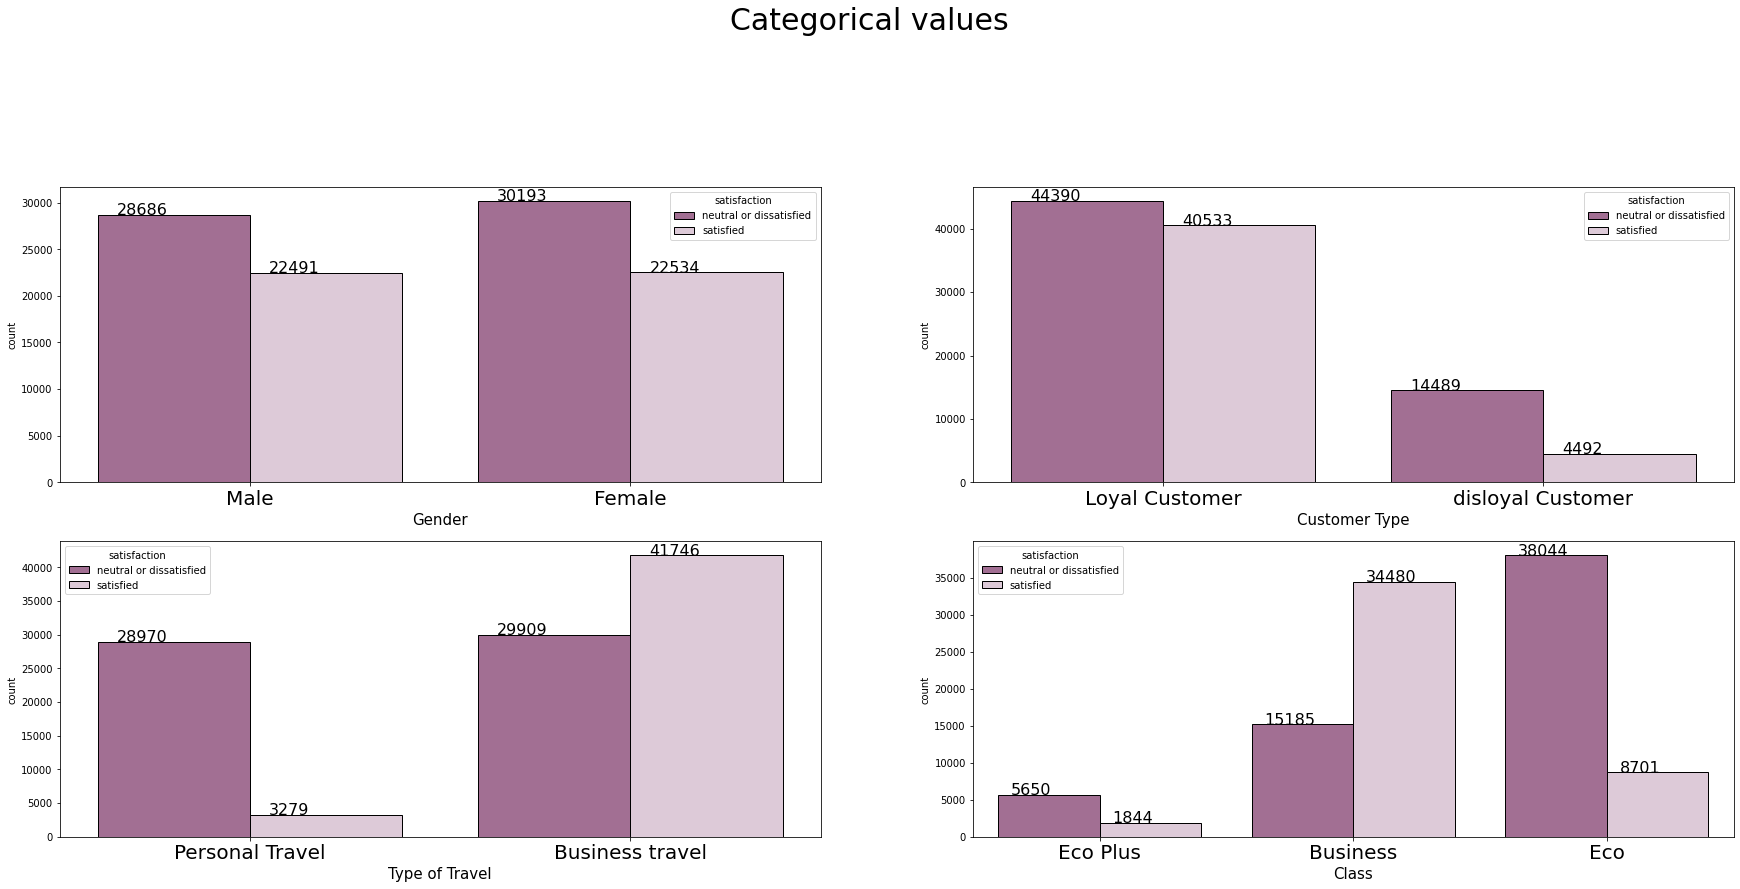

'\nSome of the categotical variables below have a potentially high descriminative power of target variable!\n'

In [ ]:
fig = plt.figure(figsize=(30, 25))
plt.suptitle("Categorical values", fontsize=30)

for ax_id, column in enumerate(categ_cols_graphics):
    ax = plt.subplot(4, 2, ax_id + 1)
    select_col = sns.countplot(x=column, data=train, hue="satisfaction",
                               palette=['#aa6697', '#e0c7d9'],
                                edgecolor='black')
    plt.xlabel(column,fontsize=15)
    plt.xticks(size=20)

    for iter_ in select_col.patches:
        select_col.annotate(
            "{:}".format(iter_.get_height()),
            (iter_.get_x() + 0.05,
             iter_.get_height() + 15),
             fontsize=16
        )

plt.show()

'''
Some of the categotical variables below have a potentially high descriminative power of target variable!
'''

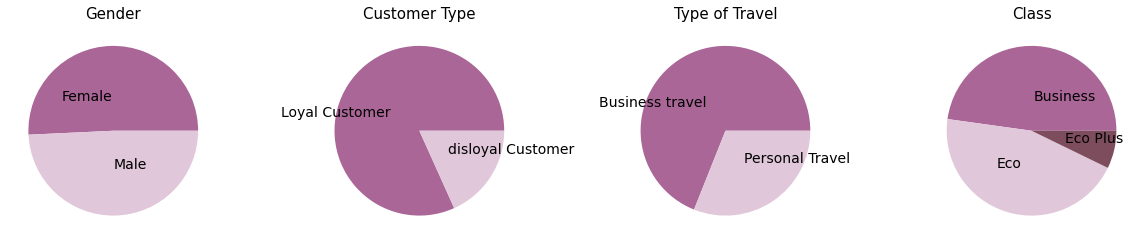

'\nInformation about subgroup shares for categorical features!\n'

In [ ]:
fig, axes = plt.subplots(1,4,figsize=(16,16))
ax = axes.ravel()
colors=['#aa6697', '#e0c7d9','#7d4d5d', '#F984E5']
# plt.suptitle("Categorical values", fontsize=15)
for i, categoric_columns in enumerate(categ_cols_graphics):
    x_label = train[categoric_columns].value_counts().index 
    y_label = train[categoric_columns].value_counts()
    ax[i].pie(labels=x_label,x=y_label,  
            colors = colors,
            pctdistance=10,
            labeldistance=0.4,
            textprops={"fontsize":14})
    
    ax[i].set_title(categoric_columns, fontsize=15)
plt.tight_layout()
plt.show()

'''
Information about subgroup shares for categorical features!
'''

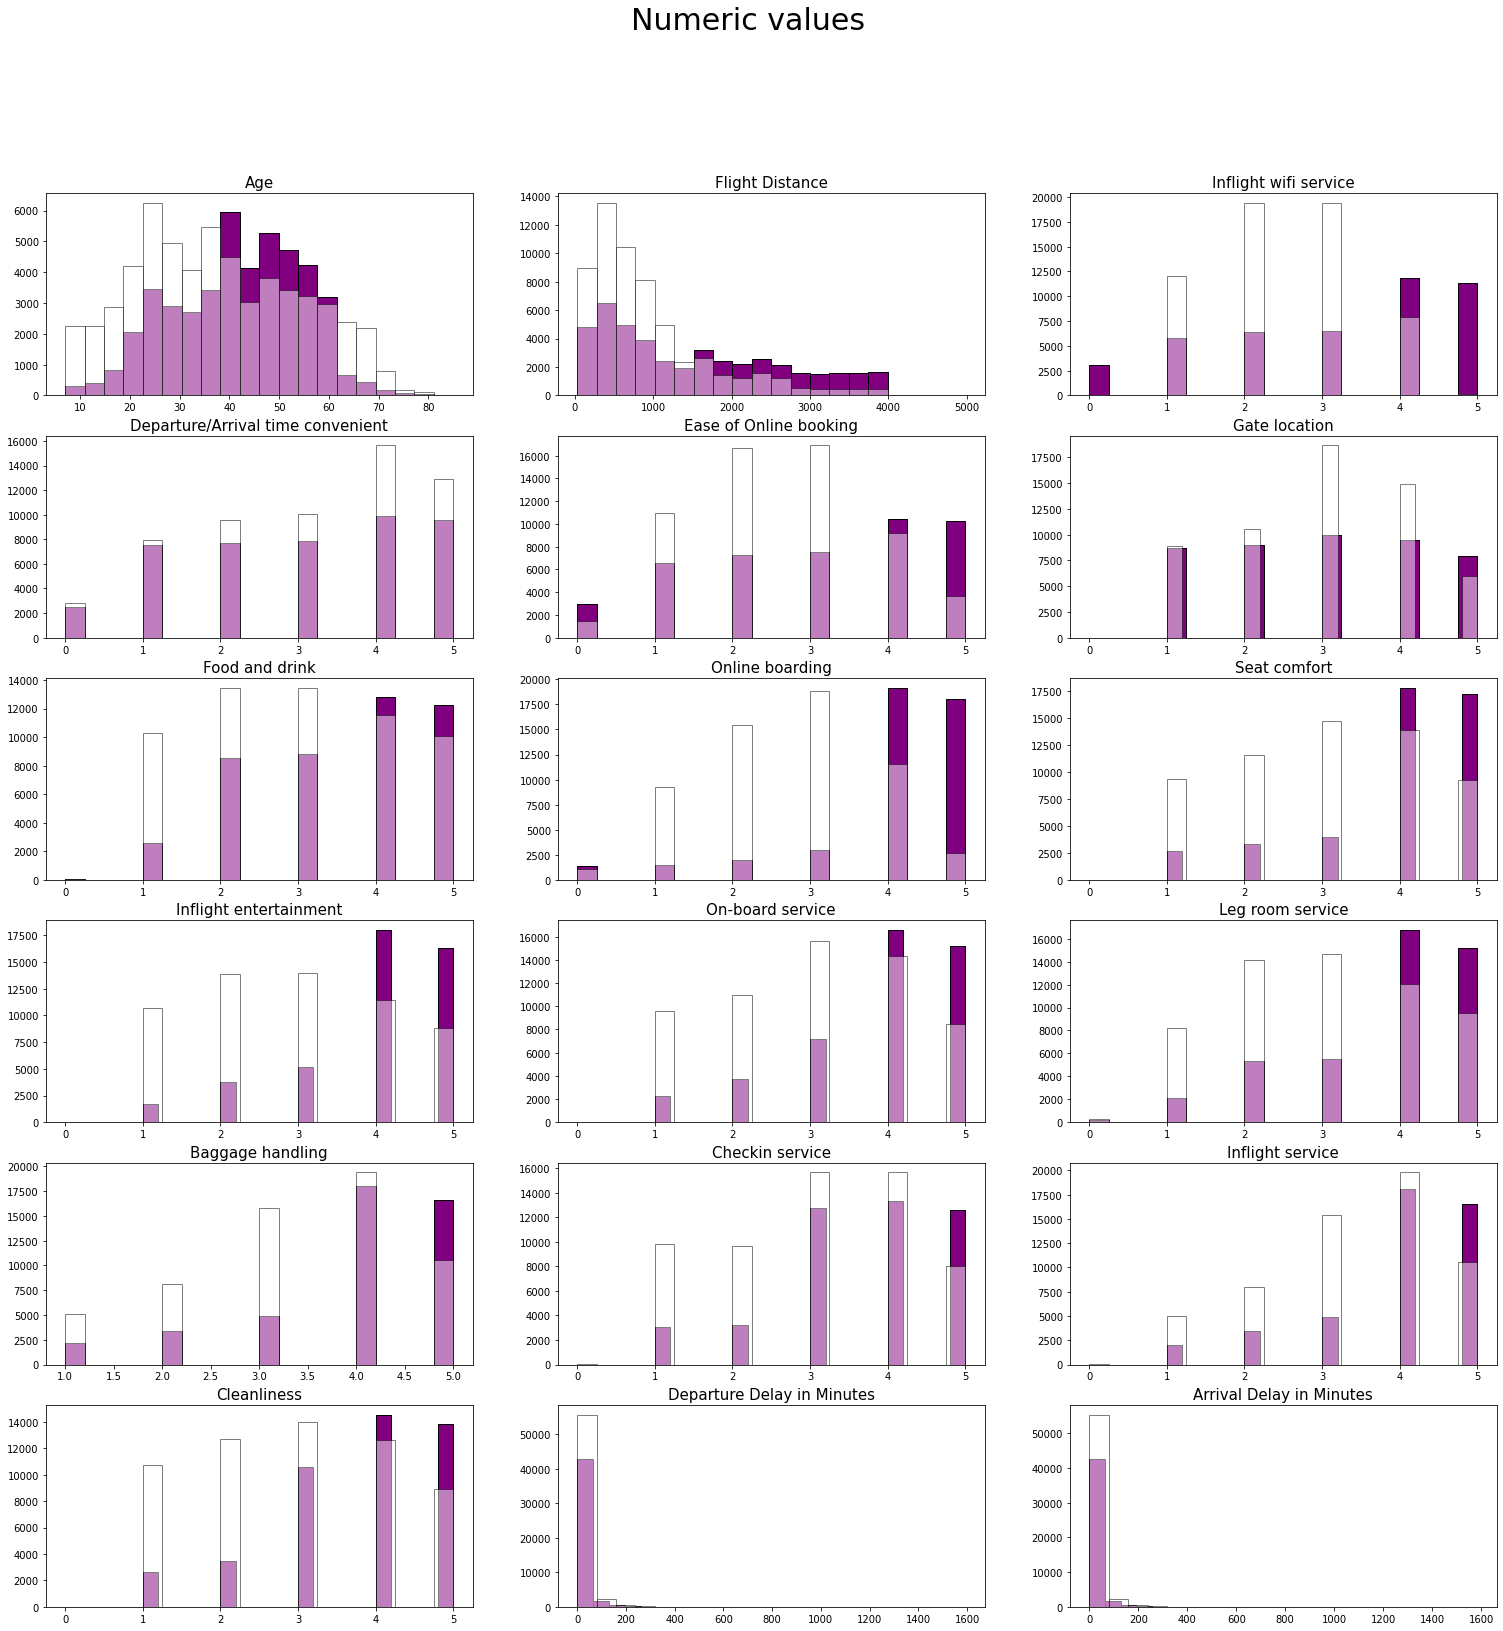

'\nDistribution of numerical values based on their target. We can see that most parts of distribution have large \nintersections.\n'

In [ ]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(26,26))
ax = axes.ravel()
plt.suptitle("Numeric values", fontsize=30)
for i, numeric_cols in enumerate(num_cols_graphics):
    x_label = train[numeric_cols].value_counts().index 
    y_label = train[numeric_cols].value_counts()
    ax[i].hist(train[train.satisfaction == "satisfied"][num_cols_graphics[i]], bins=20, edgecolor='black', color="purple")
    ax[i].hist(train[train.satisfaction == "neutral or dissatisfied"][num_cols_graphics[i]], bins=20, edgecolor='black', color="white",  alpha= 0.5,)
    ax[i].set_title(numeric_cols, fontsize=15)
# plt.tight_layout()
plt.show()

'''
Distribution of numerical values based on their target. We can see that most parts of distribution have large 
intersections.
'''

In [ ]:
'''
Coment on the graph above:
The last two variables do have outliers.
'''

'\nComent on the graph above:\nThe last two variables do have outliers.\n'

In [ ]:
train_graphics = train.iloc[:, 1:].copy()
train_graphics['Gender'] = (train['Gender'] == 'Male').astype(int)
train_graphics['Customer Type'] = (train['Customer Type'] == 'Loyal Customer').astype(int)
train_graphics["Type of Travel"] = (train['Type of Travel'] == 'Business travel').astype(int)
dummies_categ_data_train_graphics = pd.get_dummies(train["Class"], drop_first = True)
train_graphics[target_col_graphics] = (train_graphics[target_col_graphics] == 'satisfied').astype(int)

train_graphics = pd.concat([train_graphics[num_cols_graphics], dummies_categ_data_train_graphics,
                            train_graphics[['Customer Type', 'Gender',"Type of Travel", "satisfaction"]]], axis=1)

num_cols_corr= num_cols_graphics
categ_cols_corr = train_graphics.columns[18:23].tolist()
target_col_corr = train_graphics.columns[[-1]].tolist()

"\nIn general, most features are not significantly correlated.\nHowever, some of them are hihgly correlated. For example, 'Departure delay' and 'Arrival delay' \n"

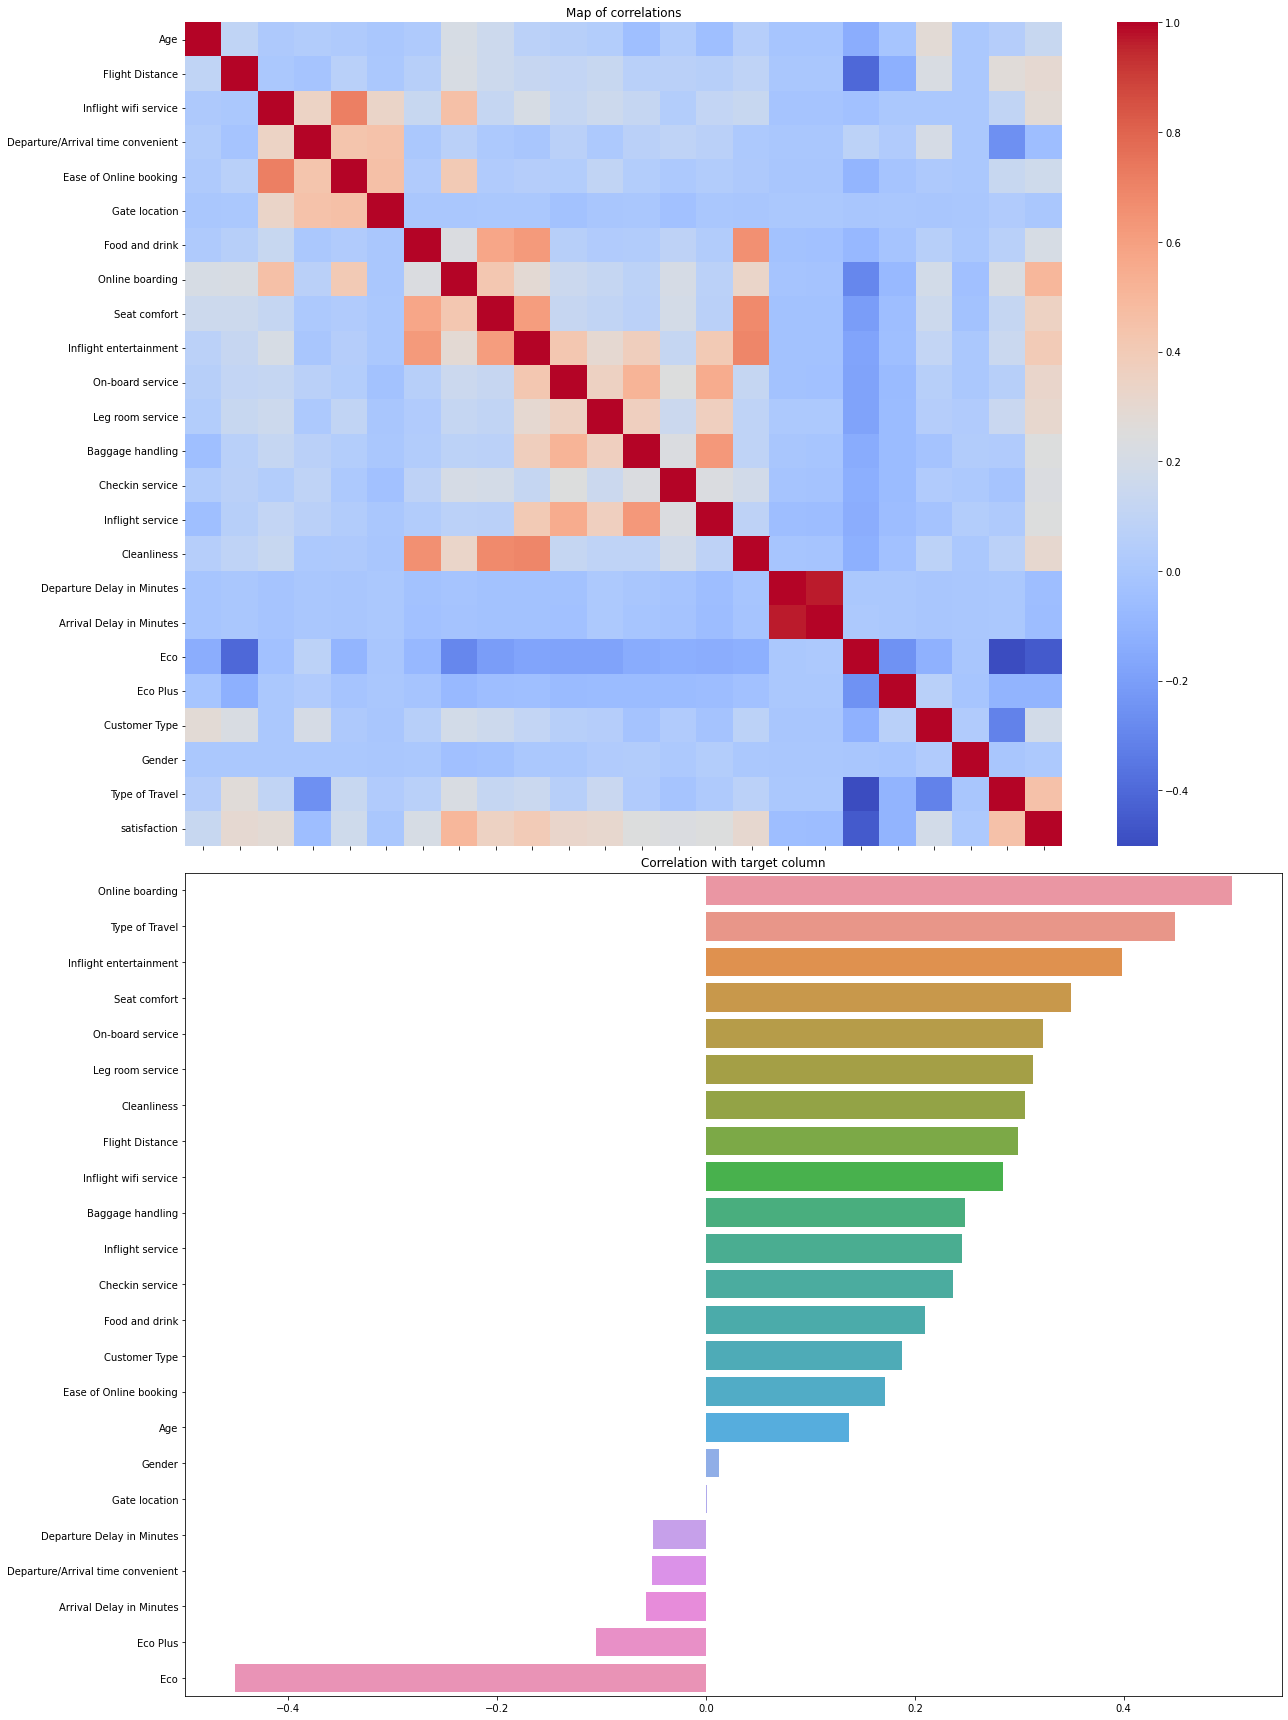

In [ ]:
_, axes = plt.subplots(2, 1, figsize=(18, 24))
sns.heatmap(train_graphics.corr(), cmap='coolwarm', ax=axes[0])
axes[0].set(xticklabels=[], title='Map of correlations')

train_graphics_corr = pd.DataFrame(train_graphics.iloc[:, :-1].corrwith(train_graphics.iloc[:, -1]).sort_values(ascending=False)).transpose()
sns.barplot(data=train_graphics_corr, ax=axes[1], orient='h')
axes[1].set(title='Correlation with target column')
plt.tight_layout()

'''
In general, most features are not significantly correlated.
However, some of them are hihgly correlated. For example, 'Departure delay' and 'Arrival delay' 
'''

## Assignment (you can start on Dec, 11)

1. Create new features based on your EDA. Don't forget to check how they performed after you are finished with modelling! You can use ``feature_importances`` from scikit-learn or use advanced methods like SHAP or Lime. (5 points)
2. Your target variable is ``satisfaction``. You should research metrics and choose one or multiple that you will use to validate your model. Write down the formula(s) and your motivation to use them. (3 points)
2. Design the validation process: for example, will you use cross-validation or just train-test split? Will you account for the imbalance in classes, if it exists? (2 points)
3. Experiment with modelling. You can use models from the lecture or do your own research. You can also try out approaches like stacking and blending – will they increase the quality? (15 points)
4. Make predictions on the test.csv dataset.

In [ ]:
# Defining necessary functions
def calc_metrics(y_true, y_predicted, proba):
    return {'Accuracy': accuracy_score(y_true, y_predicted),
            "F-1 score": f1_score(y_true, y_predicted),
            "AUC-ROC": roc_auc_score(y_true, proba)}


### First iteration model

- After we have conducted an EDA with all variables, we can start modelling. The main question for us right now is regarding variables with only 4-6 subgroups, which have numeric type in pandas.DataFrame. These are the following columns - first group (1): 

'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 
'Inflight service', 'Cleanliness'

- Other 4 variables (second group (2)) - 'Gender', 'Customer Type', 'Type of Travel', 'Class' - are 100% categorical.
- Current issue is the following: how should we use those ~15 variables? As numerical or categorical? This question is raised because there is definitely non-linear dependence between those variables and target. For example, we see that for variable "Inflight wifi service" responses with value = 0 and value = 5 have the highest satisfaction, whereas for values 1 to 4 the satisfaction is lower. Therefore, if we leave such factors as numerical ones, we might add wrong rlationship between 
- In the first iteration we will start with the following specification: we treat first group (1) as numerical ones, second group - categorical ones.

In [ ]:
# filling NAs with medians
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].median())
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].fillna(test['Arrival Delay in Minutes'].median())

# object-type variables are transformed
x_train = pd.get_dummies(train.drop(['satisfaction', 'id'], axis=1))
x_test = pd.get_dummies(test.drop(['satisfaction', 'id'], axis=1))


y_train = train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
y_test = test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})


In [ ]:
x_train.shape, x_test.shape

((103904, 27), (25976, 27))

In [ ]:
from sklearn.model_selection import GridSearchCV

model = CatBoostClassifier(loss_function='Logloss')
model.fit(x_train, y_train,verbose=False)

In [ ]:
proba = model.predict_proba(x_test)[:,1]
y_pred = model.predict(x_test)
calc_metrics(y_test,y_pred,proba)

{'Accuracy': 0.9642362180474284,
 'F-1 score': 0.9586982616814119,
 'AUC-ROC': 0.9955223295620829}

### Second iteration model

- In this section we continue our experiment. But now we treat all variables from the first group as categorical. Let us see if the quality of the model rises.

In [ ]:
# Making most of the variable for which it makes sence - categorical 

make_categorical = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink',
'Online boarding','Leg room service']

model_2 = CatBoostClassifier(cat_features = np.array([x_train.columns.get_loc(c) for c in make_categorical]) )
model_2.fit(x_train, y_train,verbose=False)

proba = model_2.predict_proba(x_test)[:,1]
y_pred = model_2.predict(x_test)
calc_metrics(y_test,y_pred,proba)


{'Accuracy': 0.964736680012319,
 'F-1 score': 0.9593142044949808,
 'AUC-ROC': 0.9955189054799208}

### Outliers

- In the first section we have noticed that some variables have outliers. More precisely, these are "Departure Delay in Minutes" and "Arrival Delay in Minutes". Moreover, we can see that such factors have a very high correlation = 96.5%. We suggest dropping one of them - "Arrival Delay in Minutes" - due to very high correlation and common sense: if a flight has departed 30 later than expected, it is highly likely that it will arive also 30 minutes later. 

The reason why we have chosen to drop "Arrival Delay" rather than "Departure delay" is that there are NAs in "Arrival Delay" and although we have replaced them with median we believe that from the pair "Departure delay" and "Arrival Delay" - "Arrival Delay" should be dropped.


- To consider the problem of outliers, we will calculate the value of 99% quantile on the train sample and create new feature with dummy-indicator: 1 if Arrival Delay in Minutes > 99% quantile and less otherwise. We will use this logic also for test sample

In [ ]:
value_99 = np.quantile(x_train['Departure Delay in Minutes'], 0.99)

def mark_df(data, value):
    data['dummy_dep'] = 0
    data.loc[data['Departure Delay in Minutes'] > value, 'dummy_dep'] = 1
    data.loc[data['Departure Delay in Minutes'] <= value, 'dummy_dep'] = 0
    return data

x_train = mark_df(x_train, value_99)
x_test = mark_df(x_test, value_99)
x_test.drop(columns = ['Arrival Delay in Minutes'],inplace = True)
x_train.drop(columns = ['Arrival Delay in Minutes'],inplace = True)


make_categorical = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink',
'Online boarding','Leg room service']

model_3 = CatBoostClassifier(cat_features = np.array([x_train.columns.get_loc(c) for c in make_categorical]) )
model_3.fit(x_train, y_train,verbose=False)

proba = model_3.predict_proba(x_test)[:,1]
y_pred = model_3.predict(x_test)
calc_metrics(y_test,y_pred,proba)

{'Accuracy': 0.9649676624576532,
 'F-1 score': 0.9595339736748488,
 'AUC-ROC': 0.9954204255070194}

### Final model

 - After fitting all 3 possible models, we have decided to stay with the third one. We see that both accuracy and F-1 score are higher than for the first and second model. At the same time, ROC-AUC is worse. However, we do believe that we can tune the hyperparameters and improve our results

In [ ]:
start = time.process_time()
grid = { 
        "loss_function":['Logloss','CrossEntropy'],
        "iterations": [1500],
        "learning_rate":[0.15, 0.09],
        "depth": [9, 10]
        }

model = CatBoostClassifier(l2_leaf_reg = 9, task_type="GPU")
clf = GridSearchCV(model, grid)
clf.fit(x_train, y_train,verbose=False)

# extracting best parameters
best_params = clf.best_params_

model_final = CatBoostClassifier(l2_leaf_reg = 9, **best_params,task_type="GPU")
model_final.fit(x_train, y_train)

print(f'Time taken by GridSeacrch = {round((time.process_time() - start)/60)} minutes')

0:	learn: 0.5230933	total: 14.2ms	remaining: 21.2s
1:	learn: 0.4123317	total: 27.6ms	remaining: 20.6s
2:	learn: 0.3484685	total: 40.9ms	remaining: 20.4s
3:	learn: 0.3018541	total: 54.3ms	remaining: 20.3s
4:	learn: 0.2673608	total: 67.7ms	remaining: 20.2s
5:	learn: 0.2343167	total: 81ms	remaining: 20.2s
6:	learn: 0.2119535	total: 94.5ms	remaining: 20.2s
7:	learn: 0.1897573	total: 108ms	remaining: 20.1s
8:	learn: 0.1736767	total: 121ms	remaining: 20s
9:	learn: 0.1667015	total: 135ms	remaining: 20.1s
10:	learn: 0.1597926	total: 148ms	remaining: 20s
11:	learn: 0.1525996	total: 162ms	remaining: 20.1s
12:	learn: 0.1462994	total: 175ms	remaining: 20s
13:	learn: 0.1423139	total: 190ms	remaining: 20.1s
14:	learn: 0.1379730	total: 203ms	remaining: 20.1s
15:	learn: 0.1348029	total: 222ms	remaining: 20.6s
16:	learn: 0.1315859	total: 236ms	remaining: 20.6s
17:	learn: 0.1288806	total: 250ms	remaining: 20.6s
18:	learn: 0.1256084	total: 263ms	remaining: 20.5s
19:	learn: 0.1235375	total: 277ms	remainin

In [ ]:
proba = model_final.predict_proba(x_test)[:,1]
y_pred = model_final.predict(x_test)
calc_metrics(y_test,y_pred,proba)

{'Accuracy': 0.9630428087465353,
 'F-1 score': 0.9573939286348304,
 'AUC-ROC': 0.994851131227985}

In [ ]:
# Saving predictions
writer = pd.ExcelWriter('output.xlsx')
pd.DataFrame(calc_metrics(y_test,y_pred,proba),index=[0]).to_excel(writer,sheet_name = 'metrics',index=False)
predictions = pd.DataFrame({'satisfaction true':y_test,'satisfaction predicted':y_pred}).replace({0:'neutral or dissatisfied', 1:'satisfied'})
predictions.to_excel(writer,sheet_name = 'predictions',index=False)
pd.DataFrame(best_params,index = [0]).to_excel(writer,sheet_name = 'best params',index = False)
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').to_excel(writer,sheet_name='cv_results',index = False)
writer.save()

'''
You can find the following data in 'output.xlsx':
1. predicted and true values on test sample (sheet name = 'metrics')
2. parameters of final Catboost model
3. cv results
'''



"\nYou can find the following data in 'output.xlsx':\n1. predicted and true values on test sample (sheet name = 'metrics')\n2. parameters of final Catboost model\n3. cv results\n"

### Feature importance

 - Let's see the impact of model variables. We can use the built-in function of feature importance

In [ ]:
pd.DataFrame(zip(model_final.feature_importances_, model_final.feature_names_), 
             columns=['Importance', 'Name']).sort_values('Importance')

,Importance,Name
26,0.006792,dummy_dep
25,0.167896,Class_Eco Plus
18,0.284828,Gender_Male
17,0.868053,Gender_Female
6,1.015679,Food and drink
24,1.175139,Class_Eco
4,1.659212,Ease of Online booking
3,2.037859,Departure/Arrival time convenient
16,2.254783,Departure Delay in Minutes
15,2.419782,Cleanliness


 - It's clear that just 4-5 variables account for the biggest impact on the output
 
 - If from business perspective (economy on collecting & preproccessing data) it would be necessary to reduce the number of features, it could have been easily done from 27 to 5-10. However, right now we don't have such aim.

### Data visualization

 - Now using SHAP values we can see how every variables influences the output. We can see on the graph below that it's 4-5 or even just 1-2 features that have the biggest influence on the output. However, we could also see that on the feature importance table

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 15.0 MB/s 


In [ ]:
import shap as shap
shap.initjs()

explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[::300], x_train.iloc[::300])

### There are problems with showing the graph here after downloading file from colab
### So the graph is included as photo